In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import string
path ='/content/drive/MyDrive/text_classification/' 

In [ ]:
# Read the data and take only 1000 Reviews
data = pd.read_excel(path+'123.xlsx')
print("Total Reviews:",len(data),
      "\nTotal Correct Sentences:",len(data[data.category=='correct']),
      "\nTotal Inorrect Sentences:",len(data[data.category=='incorrect']))

Total Reviews: 4404 
Total Correct Sentences: 2156 
Total Inorrect Sentences: 2248


In [ ]:
data

,content,category
0,আপনার সাথে আমার একটি গোপন পরার্মশ আছে ।,incorrect
1,আপনার সঙ্গে আমার একটি গোপনীয় পরার্মশ আছে ।,correct
2,তোমার সাথে আমার একটি গোপন পরার্মশ আছে ।,incorrect
3,তোমার সঙ্গে আমার একটি গোপনীয় পরামর্শ আছে ।,correct
4,মনে রাখবে আবশ্যকীয় ব্যয়ে কার্পণ্যতা অনুচিৎ ।,incorrect
...,...,...
4399,মূমুর্ষু অবস্থায় স্যার হাসপাতালে রয়েছেন ।,incorrect
4400,মূমুর্ষু অবস্থায় রহিম সাহেব হাসপাতালে রয়েছেন ।,incorrect
4401,তার দুর্নীবার ইচ্ছা শক্তি বাধা অতিক্রম করবে ।,incorrect
4402,ব্যাকরন বইটি নিয়ে আসো।,incorrect


In [ ]:
# print some sentences
sample_data = [10,100,150]
for i in sample_data:
      print(data.content[i],'\n','Language:-- ',data.category[i],'\n') 

এ বিষয়ে আপনারা সচেষ্ঠিত নহে । 
 Language:--  incorrect 

খাই আমি ভাত । 
 Language:--  incorrect 

আমি উহার উদ্ধতপূর্ণ আচারণে ব্যাথিত । 
 Language:--  incorrect 



In [ ]:
data['category'] = data.category.map({'correct':0,'incorrect':1})
label= data.category
label

0       1
1       0
2       1
3       0
4       1
       ..
4399    1
4400    1
4401    1
4402    1
4403    1
Name: category, Length: 4404, dtype: int64

In [ ]:
data['cleaned'] = data['content']

In [ ]:
# Length of each sentences
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the sentences with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 4404


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  1
Number of Documents:2248
Number of Words:14808
Number of Unique Words:1724
Most Frequent Words:

।	2128
,	230
না	196
বললেন	142
আমার	128
বলল	104
এ	100
তিনি	100
স্যার	98
আমি	94

Class Name :  0
Number of Documents:2156
Number of Words:13986
Number of Unique Words:1650
Most Frequent Words:

।	1996
,	224
না	172
?	138
আমার	128
বললেন	126
এ	100
তিনি	100
বলল	94
সে	90
Total Number of Unique Words:2155


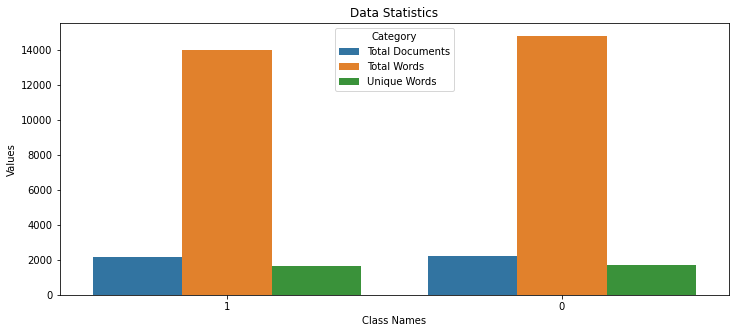

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 5))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

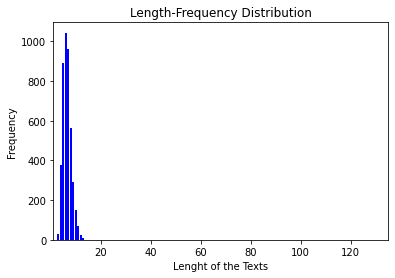

Maximum Length of a review: 13
Minimum Length of a review: 3
Average Length of a reviews: 7.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
# dataset.Tag = dataset.Tag.replace({'Very Positive':'Positive','Very Negative':'Negative'})
Correct = dataset[dataset.category == 'correct']
Incorrect = dataset[dataset.category == 'Incorrect']
# dataset = positive.append(negative,ignore_index=True)
dataset.category.value_counts()

1    2248
0    2156
Name: category, dtype: int64

In [ ]:
pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data['content']

0               আপনার সাথে আমার একটি গোপন পরার্মশ আছে ।
1            আপনার সঙ্গে আমার একটি গোপনীয় পরার্মশ আছে ।
2               তোমার সাথে আমার একটি গোপন পরার্মশ আছে ।
3            তোমার সঙ্গে আমার একটি গোপনীয় পরামর্শ আছে ।
4          মনে রাখবে আবশ্যকীয় ব্যয়ে কার্পণ্যতা অনুচিৎ ।
                             ...                       
4399         মূমুর্ষু অবস্থায় স্যার হাসপাতালে রয়েছেন  ।
4400    মূমুর্ষু অবস্থায় রহিম সাহেব হাসপাতালে রয়েছেন  ।
4401      তার দুর্নীবার ইচ্ছা শক্তি বাধা অতিক্রম করবে ।
4402                             ব্যাকরন বইটি নিয়ে আসো।
4403                              আমার ব্যাকরন বই নেয় ।
Name: content, Length: 4404, dtype: object

In [ ]:
from bnlp import POS
bn_pos = POS()
text ='আজকে ছাত্ররা উপস্থিত ছিল।'
model_path = "/content/drive/MyDrive/text_classification/bn_pos.pkl"
rt= bn_pos.tag(model_path,text)
print(rt)
      

[('আজকে', 'ALC'), ('ছাত্ররা', 'NC'), ('উপস্থিত', 'JJ'), ('ছিল', 'VM'), ('।', 'PU')]


In [ ]:
from bnlp import POS
bn_pos = POS()
model_path = "/content/drive/MyDrive/text_classification/bn_pos.pkl"
pos_data = []
for i in data['content']:
      r= bn_pos.tag(model_path,i)
      pos_data.append(r)

In [ ]:
mod_data = []
for i in range(len(pos_data)):
  data = ' '
  for j in range(len(pos_data[i])):
    for text in pos_data[i][j]:
      data = data + text + " "
  mod_data.append({
      'content': data.strip()
  })
mod_data = pd.DataFrame(mod_data)
mod_data

,content
0,আপনার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...
1,আপনার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...
2,তোমার PPR সাথে PP আমার PPR একটি JQ গোপন NC পরা...
3,তোমার PPR সঙ্গে PP আমার PPR একটি JQ গোপনীয় JJ ...
4,মনে NC রাখবে VM আবশ্যকীয় JJ ব্যয়ে NC কার্পণ্যত...
...,...
4399,মূমুর্ষু NC অবস্থায় NC স্যার NC হাসপাতালে NC র...
4400,মূমুর্ষু NC অবস্থায় NC রহিম NP সাহেব NP হাসপাত...
4401,তার PPR দুর্নীবার JQ ইচ্ছা NC শক্তি NC বাধা NC...
4402,ব্যাকরন NC বইটি NC নিয়ে VM আসো VAUX । PU


In [ ]:
# mod_data = []
# for i in range(len(pos_data)):
#   mod_data.append({
#       'content':pos_data[i]
#   })
# mod_data = pd.DataFrame(mod_data)
# print(mod_data.content[0])

# **For Unigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split())

In [ ]:
x=  vectorizer.fit_transform(mod_data['content']).toarray()
y=dataset.iloc[:,1].values

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x , y, test_size=0.2, random_state=0)

# **K-Nearest Neighbor(KNN)**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
knn_train = knn_model.score(X_train,y_train)
print('Training Accuracy:')
print(knn_train)

Training Accuracy:
0.9781436275901221


In [ ]:
knn_test = knn_model.score(X_test,y_test)
print('Testing Accuracy:')
print(knn_test)

Testing Accuracy:
0.8626560726447219


In [ ]:
k_pred= knn_model.predict(X_test)

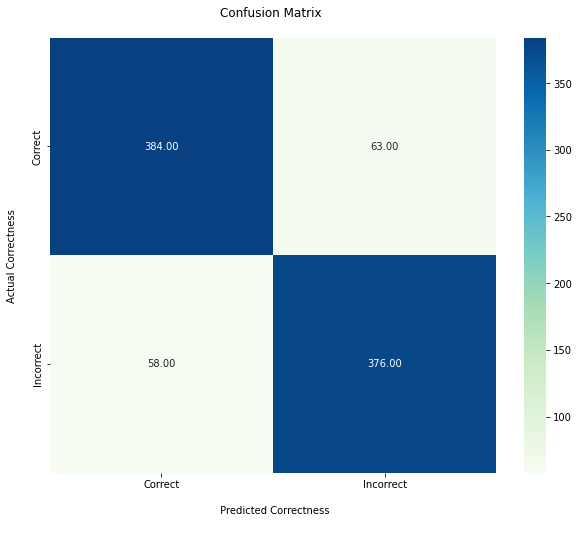

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,k_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, k_pred))
print('Precision:',precision_score(y_test, k_pred))
print('F1 score:', f1_score(y_test, k_pred))
print('Accuracy:',accuracy_score(y_test, k_pred))

recall: 0.8663594470046083
Precision: 0.856492027334852
F1 score: 0.861397479954181
Accuracy: 0.8626560726447219


## **Logistic Regression**

In [ ]:
lr_model= LogisticRegression(random_state=0)  
lr_model.fit(X_train, y_train)  
lr_train = lr_model.score(X_train,y_train)
print('Training Accuracy:',lr_train)

Training Accuracy: 0.9156968492761851


In [ ]:
lr_test = lr_model.score(X_test,y_test)
print('Testing Accuracy:', lr_test)

Testing Accuracy: 0.7854710556186152


In [ ]:
lr_pred= lr_model.predict(X_test)

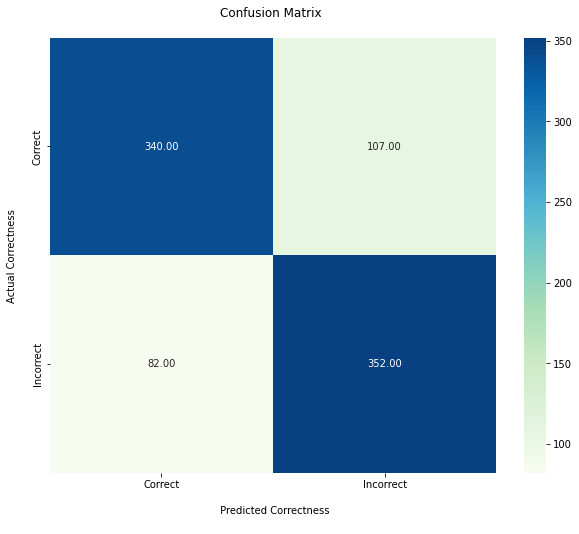

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, lr_pred))
print('Precision:',precision_score(y_test, lr_pred))
print('F1 score:', f1_score(y_test, lr_pred))
print('Accuracy:',accuracy_score(y_test, lr_pred))

recall: 0.8110599078341014
Precision: 0.7668845315904139
F1 score: 0.7883538633818589
Accuracy: 0.7854710556186152


### Random Forest

In [ ]:
rf_model= RandomForestClassifier(n_estimators = 100)  
rf_model.fit(X_train, y_train)  
rf_train = rf_model.score(X_train,y_train)
print('Training Accuracy:',rf_train)

Training Accuracy: 0.9980130570536475


In [ ]:
rf_test = rf_model.score(X_test,y_test)
print('Testing Accuracy:', rf_test)

Testing Accuracy: 0.9080590238365494


In [ ]:
rf_pred= rf_model.predict(X_test)

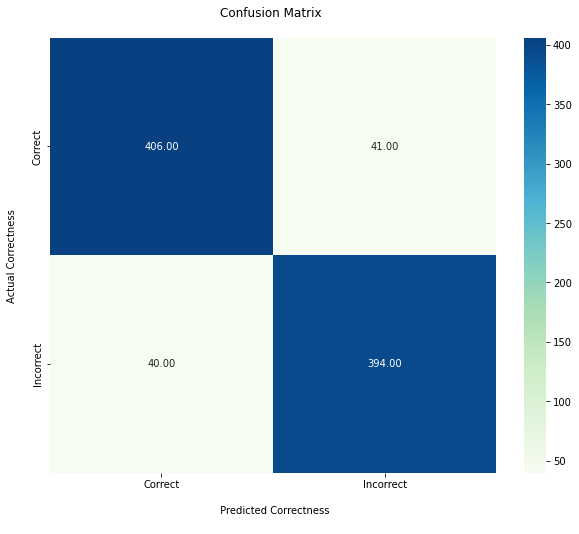

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, rf_pred))
print('Precision:',precision_score(y_test, rf_pred))
print('F1 score:', f1_score(y_test, rf_pred))
print('Accuracy:',accuracy_score(y_test, rf_pred))

recall: 0.9078341013824884
Precision: 0.9057471264367816
F1 score: 0.906789413118527
Accuracy: 0.9080590238365494


### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  
dt_train = dt_model.score(X_train,y_train)
print('Training Accuracy:',dt_train)

Training Accuracy: 0.9980130570536475


In [ ]:
dt_test = dt_model.score(X_test,y_test)
print('Testing Accuracy:', dt_test)

Testing Accuracy: 0.9375709421112373


In [ ]:
dt_pred= dt_model.predict(X_test)

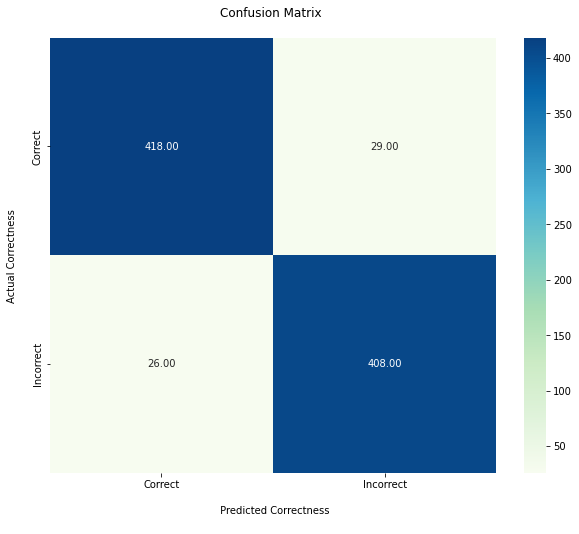

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, dt_pred))
print('Precision:',precision_score(y_test, dt_pred))
print('F1 score:', f1_score(y_test, dt_pred))
print('Accuracy:',accuracy_score(y_test, dt_pred))

recall: 0.9400921658986175
Precision: 0.9336384439359268
F1 score: 0.9368541905855339
Accuracy: 0.9375709421112373


### Multinomial Naive Bayes

In [ ]:
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train, y_train)  
mnb_train = mnb_model.score(X_train,y_train)
print('Training Accuracy:',mnb_train)

Training Accuracy: 0.9239284700539313


In [ ]:
mnb_test = mnb_model.score(X_test,y_test)
print('Testing Accuracy:', mnb_test)

Testing Accuracy: 0.8456299659477866


In [ ]:
mnb_pred= mnb_model.predict(X_test)

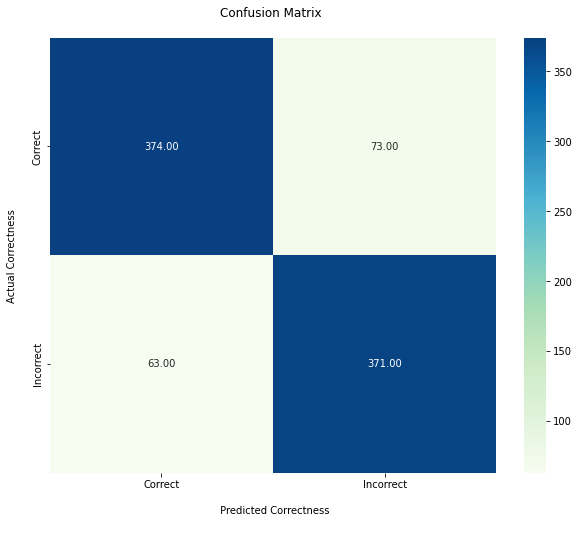

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()


In [ ]:
print('recall:',recall_score(y_test, mnb_pred))
print('Precision:',precision_score(y_test, mnb_pred))
print('F1 score:', f1_score(y_test, mnb_pred))
print('Accuracy:',accuracy_score(y_test, mnb_pred))

recall: 0.8548387096774194
Precision: 0.8355855855855856
F1 score: 0.8451025056947609
Accuracy: 0.8456299659477866


# **BAGGING CLASSFIER**

In [ ]:
# define a decision tree classifier as the base estimator
base_estimator = DecisionTreeClassifier()

# define the bagging classifier with 100 estimators
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# train the bagging classifier on the training data
b_train = bagging.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
b_test = bagging.score(X_test,y_test)
print('Testing Accuracy:', b_test)

Testing Accuracy: 0.9080590238365494


In [ ]:
b_pred= bagging.predict(X_test)

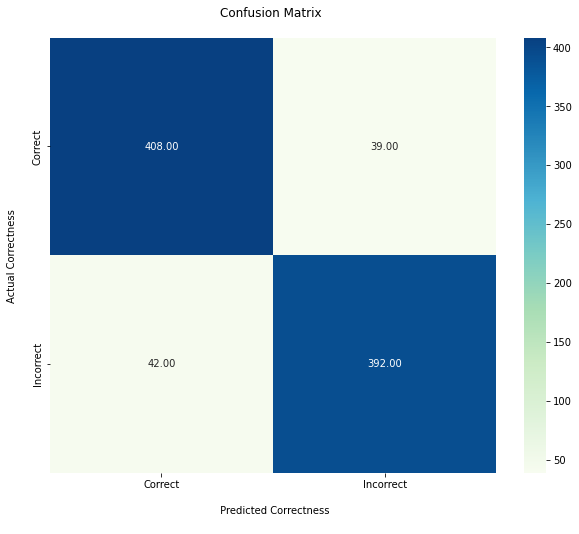

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,b_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, b_pred))
print('Precision:',precision_score(y_test, b_pred))
print('F1 score:', f1_score(y_test, b_pred))
print('Accuracy:',accuracy_score(y_test, b_pred))

recall: 0.9032258064516129
Precision: 0.9095127610208816
F1 score: 0.9063583815028902
Accuracy: 0.9080590238365494


# **STACKING CLASSIFIER**

In [ ]:
# define the base models
base_models = [('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
               ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))]

# define the meta model
meta_model = LogisticRegression()

# define the stacking classifier
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=KFold(n_splits=5))

# fit the stacking classifier on the training data
s_train=stacking.fit(X_train, y_train)

In [ ]:
s_test = stacking.score(X_test,y_test)
print('Testing Accuracy:', s_test)

Testing Accuracy: 0.9171396140749148


In [ ]:
s_pred= stacking.predict(X_test)

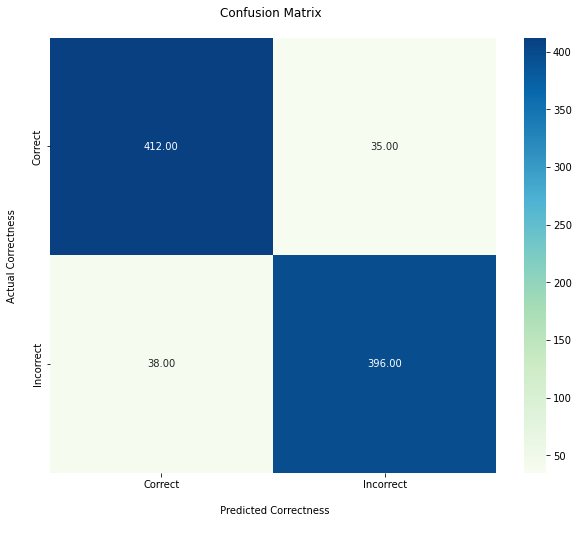

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,s_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, s_pred))
print('Precision:',precision_score(y_test, s_pred))
print('F1 score:', f1_score(y_test, s_pred))
print('Accuracy:',accuracy_score(y_test, s_pred))

recall: 0.9124423963133641
Precision: 0.9187935034802784
F1 score: 0.915606936416185
Accuracy: 0.9171396140749148


# **VOTING CLASSIFIER**

In [ ]:
# Define the individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('nb', clf2), ('knn', clf3)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
v_test = voting_clf.score(X_test,y_test)
print('Testing Accuracy:', v_test)

Testing Accuracy: 0.8887627695800226


In [ ]:
v_pred= voting_clf.predict(X_test)

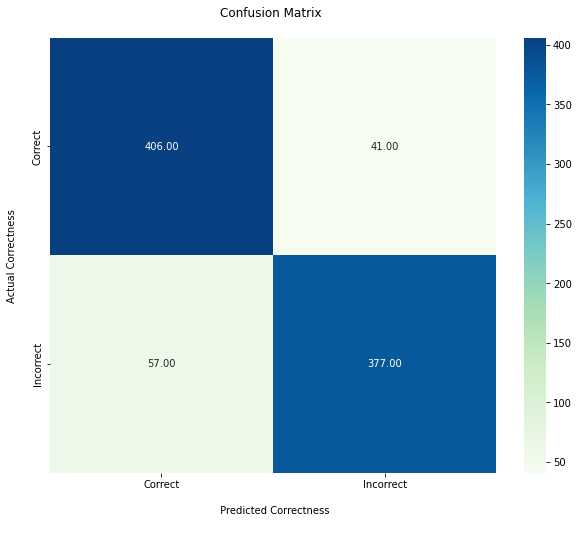

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,v_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, v_pred))
print('Precision:',precision_score(y_test, v_pred))
print('F1 score:', f1_score(y_test, v_pred))
print('Accuracy:',accuracy_score(y_test, v_pred))

recall: 0.868663594470046
Precision: 0.9019138755980861
F1 score: 0.8849765258215961
Accuracy: 0.8887627695800226


# **For Bigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split())

In [ ]:
x1=  vectorizer1.fit_transform(mod_data['content']).toarray()
y1=dataset.iloc[:,1].values

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x1 , y1, test_size=0.2, random_state=0)

# **K-Nearest Neighbor(KNN)**

In [ ]:
knn_model1 = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model1.fit(X_train1,y_train1)
knn_train1 = knn_model1.score(X_train1,y_train1)
print('Training Accuracy:')
print(knn_train1)

Training Accuracy:
0.9753051376667613


In [ ]:
knn_test1 = knn_model1.score(X_test1,y_test1)
print('Testing Accuracy:')
print(knn_test1)

Testing Accuracy:
0.8444948921679909


In [ ]:
k_pred1= knn_model1.predict(X_test1)

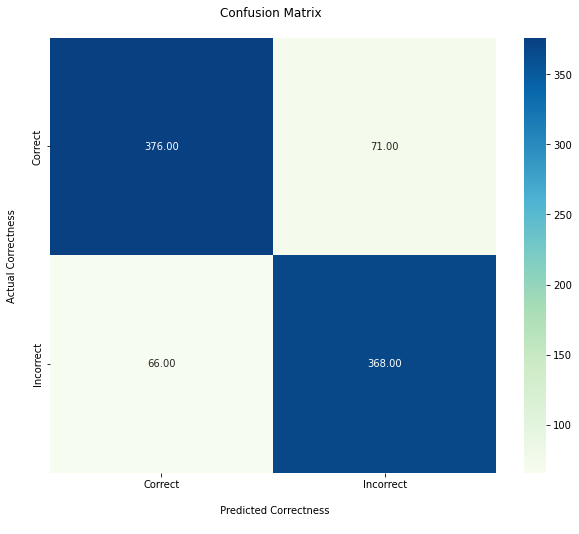

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,k_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, k_pred1))
print('Precision:',precision_score(y_test1, k_pred1))
print('F1 score:', f1_score(y_test1, k_pred1))
print('Accuracy:',accuracy_score(y_test1, k_pred1))

recall: 0.847926267281106
Precision: 0.8382687927107062
F1 score: 0.8430698739977092
Accuracy: 0.8444948921679909


## **Logistic Regression**

In [ ]:
lr_model1= LogisticRegression(random_state=0)  
lr_model1.fit(X_train1, y_train1)  
lr_train1 = lr_model1.score(X_train1,y_train1)
print('Training Accuracy:',lr_train1)

Training Accuracy: 0.9443655975021289


In [ ]:
lr_test1 = lr_model1.score(X_test1,y_test1)
print('Testing Accuracy:', lr_test1)

Testing Accuracy: 0.8320090805902384


In [ ]:
lr_pred1= lr_model1.predict(X_test1)

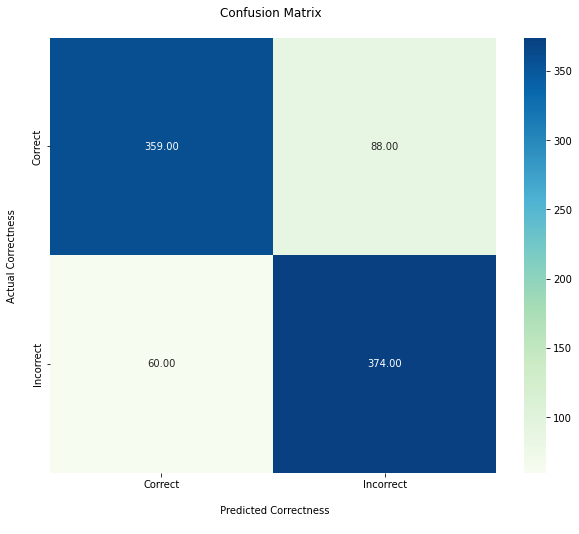

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,lr_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, lr_pred1))
print('Precision:',precision_score(y_test1, lr_pred1))
print('F1 score:', f1_score(y_test1, lr_pred1))
print('Accuracy:',accuracy_score(y_test1, lr_pred1))

recall: 0.8617511520737328
Precision: 0.8095238095238095
F1 score: 0.8348214285714286
Accuracy: 0.8320090805902384


### Random Forest

In [ ]:
rf_model1= RandomForestClassifier(n_estimators = 100)  
rf_model1.fit(X_train1, y_train1)  
rf_train1 = rf_model1.score(X_train1,y_train1)
print('Training Accuracy:',rf_train1)

Training Accuracy: 1.0


In [ ]:
rf_test1 = rf_model1.score(X_test1,y_test1)
print('Testing Accuracy:', rf_test1)

Testing Accuracy: 0.9114642451759364


In [ ]:
rf_pred1= rf_model1.predict(X_test1)

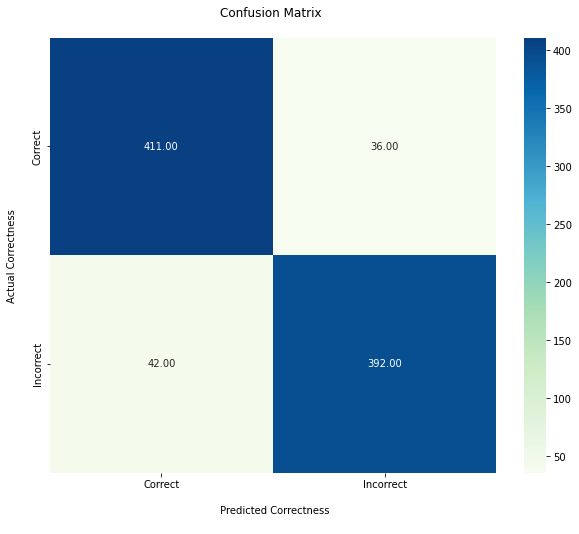

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,rf_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, rf_pred1))
print('Precision:',precision_score(y_test1, rf_pred1))
print('F1 score:', f1_score(y_test1, rf_pred1))
print('Accuracy:',accuracy_score(y_test1, rf_pred1))

recall: 0.9032258064516129
Precision: 0.9158878504672897
F1 score: 0.9095127610208816
Accuracy: 0.9114642451759364


### Decision Tree

In [ ]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(X_train1, y_train1)  
dt_train1 = dt_model1.score(X_train1,y_train1)
print('Training Accuracy:',dt_train1)

Training Accuracy: 1.0


In [ ]:
dt_test1 = dt_model1.score(X_test1,y_test1)
print('Testing Accuracy:', dt_test1)

Testing Accuracy: 0.9387060158910329


In [ ]:
dt_pred1= dt_model1.predict(X_test1)

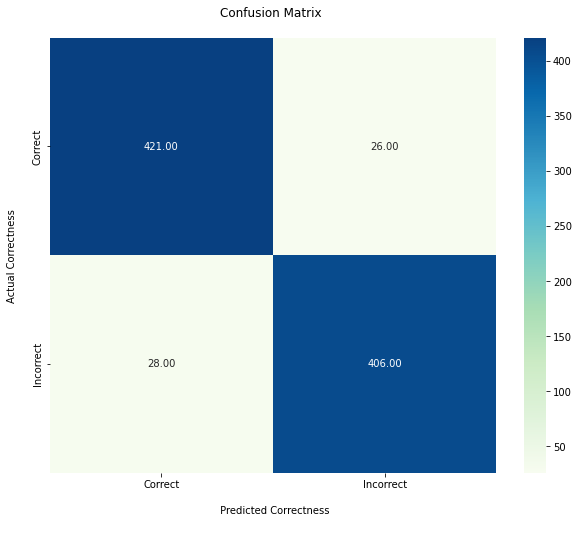

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,dt_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, dt_pred1))
print('Precision:',precision_score(y_test1, dt_pred1))
print('F1 score:', f1_score(y_test1, dt_pred1))
print('Accuracy:',accuracy_score(y_test1, dt_pred1))

recall: 0.9354838709677419
Precision: 0.9398148148148148
F1 score: 0.9376443418013857
Accuracy: 0.9387060158910329


# **Multinomial Naive Bayes**

In [ ]:
mnb_model1 = MultinomialNB(alpha=0.15)
mnb_model1.fit(X_train1, y_train1)  
mnb_train1 = mnb_model1.score(X_train1,y_train1)
print('Training Accuracy:',mnb_train1)

Training Accuracy: 0.9426625035481124


In [ ]:
mnb_test1 = mnb_model1.score(X_test1,y_test1)
print('Testing Accuracy:', mnb_test1)

Testing Accuracy: 0.8433598183881952


In [ ]:
mnb_pred1= mnb_model1.predict(X_test1)

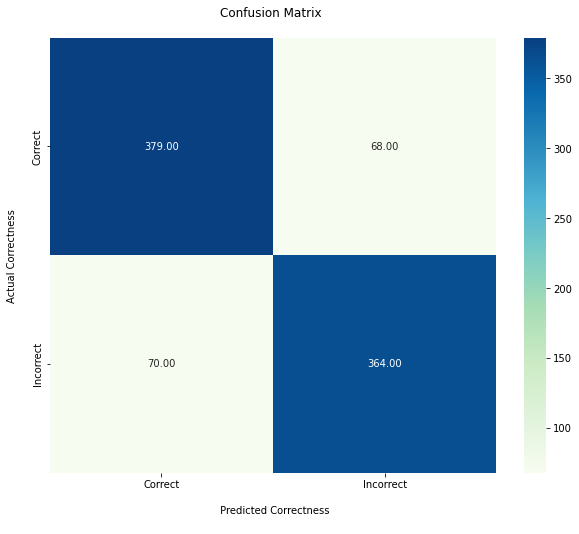

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,mnb_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()


In [ ]:
print('recall:',recall_score(y_test1, mnb_pred1))
print('Precision:',precision_score(y_test1, mnb_pred1))
print('F1 score:', f1_score(y_test1, mnb_pred1))
print('Accuracy:',accuracy_score(y_test1, mnb_pred1))

recall: 0.8387096774193549
Precision: 0.8425925925925926
F1 score: 0.8406466512702079
Accuracy: 0.8433598183881952


# **BAGGING CLASSFIER**

In [ ]:
# define a decision tree classifier as the base estimator
base_estimator1 = DecisionTreeClassifier()

# define the bagging classifier with 100 estimators
bagging1 = BaggingClassifier(base_estimator=base_estimator1, n_estimators=100, random_state=42)

# train the bagging classifier on the training data
b_train1 = bagging1.fit(X_train1, y_train1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
b_test1 = bagging1.score(X_test1,y_test1)
print('Testing Accuracy:', b_test1)

Testing Accuracy: 0.9205448354143019


In [ ]:
b_pred1= bagging1.predict(X_test1)

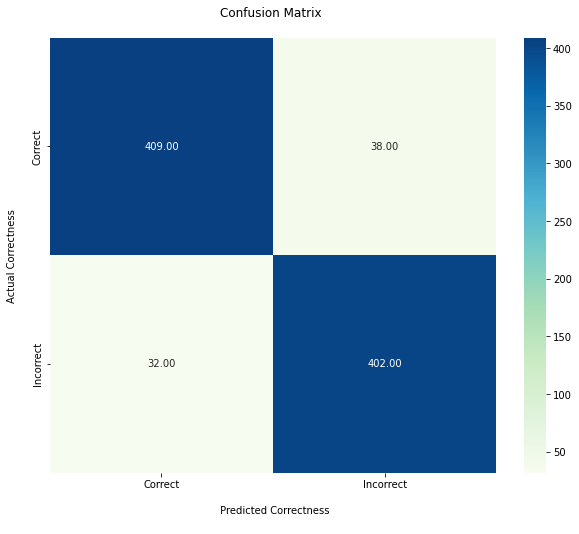

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,b_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, b_pred1))
print('Precision:',precision_score(y_test1, b_pred1))
print('F1 score:', f1_score(y_test1, b_pred1))
print('Accuracy:',accuracy_score(y_test1, b_pred1))

recall: 0.9262672811059908
Precision: 0.9136363636363637
F1 score: 0.919908466819222
Accuracy: 0.9205448354143019


# **STACKING CLASSIFIER**

In [ ]:
# define the base models
base_models1 = [('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
               ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))]

# define the meta model
meta_model1 = LogisticRegression()

# define the stacking classifier
stacking1 = StackingClassifier(estimators=base_models1, final_estimator=meta_model1, cv=KFold(n_splits=5))

# fit the stacking classifier on the training data
s_train1=stacking1.fit(X_train1, y_train1)

In [ ]:
s_test1 = stacking1.score(X_test1,y_test1)
print('Testing Accuracy:', s_test1)

Testing Accuracy: 0.9114642451759364


In [ ]:
s_pred1= stacking1.predict(X_test1)

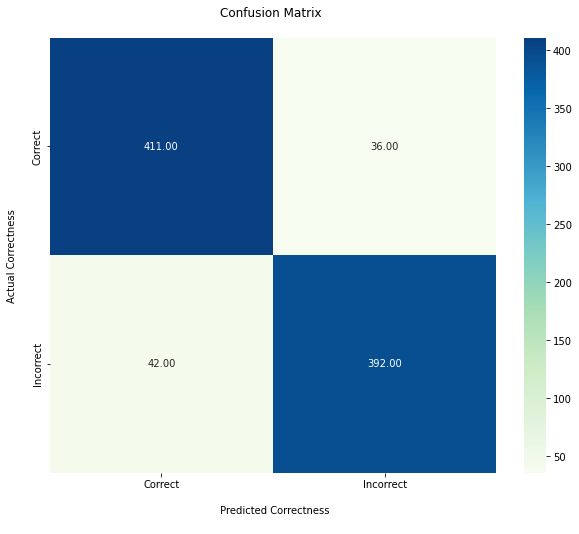

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,s_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, s_pred1))
print('Precision:',precision_score(y_test1, s_pred1))
print('F1 score:', f1_score(y_test1, s_pred1))
print('Accuracy:',accuracy_score(y_test1, s_pred1))

recall: 0.9032258064516129
Precision: 0.9158878504672897
F1 score: 0.9095127610208816
Accuracy: 0.9114642451759364


# **VOTING CLASSIFIER**

In [ ]:
# Define the individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)

# Define the voting classifier
voting_clf1 = VotingClassifier(estimators=[('lr', clf1), ('nb', clf2), ('knn', clf3)], voting='hard')

# Train the voting classifier on the training data
voting_clf1.fit(X_train1, y_train1)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
v_test1 = voting_clf1.score(X_test1,y_test1)
print('Testing Accuracy:', v_test1)

Testing Accuracy: 0.9080590238365494


In [ ]:
v_pred1= voting_clf1.predict(X_test1)

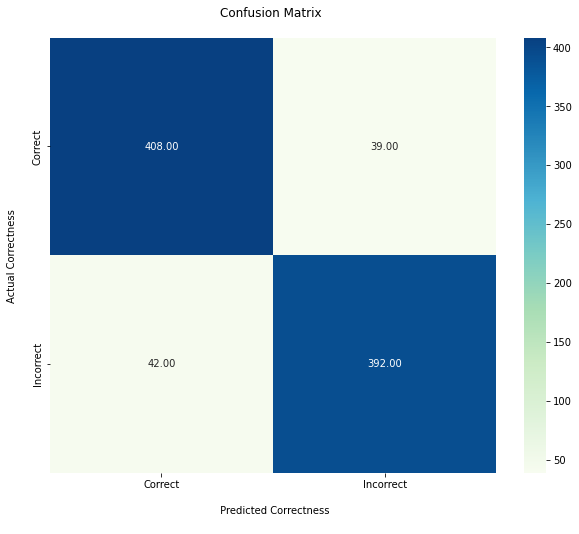

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test1,v_pred1), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test1, v_pred1))
print('Precision:',precision_score(y_test1, v_pred1))
print('F1 score:', f1_score(y_test1, v_pred1))
print('Accuracy:',accuracy_score(y_test1, v_pred1))

recall: 0.9032258064516129
Precision: 0.9095127610208816
F1 score: 0.9063583815028902
Accuracy: 0.9080590238365494


# **For Trigram**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())

In [ ]:
x2=  vectorizer2.fit_transform(mod_data['content']).toarray()
y2=dataset.iloc[:,1].values

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
x2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(x2 , y2, test_size=0.2, random_state=0)

# **K-Nearest Neighbor(KNN)**

In [ ]:
knn_model2 = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model2.fit(X_train2,y_train2)
knn_train2 = knn_model2.score(X_train2,y_train2)
print('Training Accuracy:')
print(knn_train2)

Training Accuracy:
0.974169741697417


In [ ]:
knn_test2 = knn_model2.score(X_test2,y_test2)
print('Testing Accuracy:')
print(knn_test2)

Testing Accuracy:
0.8422247446083996


In [ ]:
k_pred2= knn_model2.predict(X_test2)

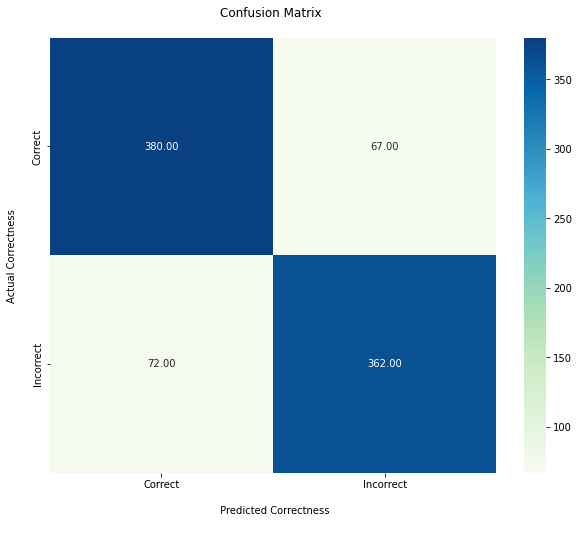

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,k_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, k_pred2))
print('Precision:',precision_score(y_test2, k_pred2))
print('F1 score:', f1_score(y_test2, k_pred2))
print('Accuracy:',accuracy_score(y_test2, k_pred2))

recall: 0.8341013824884793
Precision: 0.8438228438228438
F1 score: 0.8389339513325609
Accuracy: 0.8422247446083996


## **Logistic Regression**

In [ ]:
lr_model2= LogisticRegression(random_state=0)  
lr_model2.fit(X_train2, y_train2)  
lr_train2 = lr_model2.score(X_train2,y_train2)
print('Training Accuracy:',lr_train2)

Training Accuracy: 0.9599772920806131


In [ ]:
lr_test2 = lr_model2.score(X_test2,y_test2)
print('Testing Accuracy:', lr_test2)

Testing Accuracy: 0.8444948921679909


In [ ]:
lr_pred2= lr_model2.predict(X_test2)

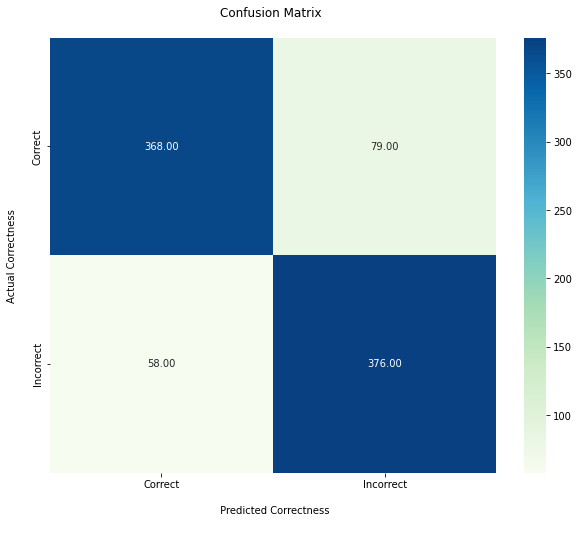

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,lr_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, lr_pred2))
print('Precision:',precision_score(y_test2, lr_pred2))
print('F1 score:', f1_score(y_test2, lr_pred2))
print('Accuracy:',accuracy_score(y_test2, lr_pred2))

recall: 0.8663594470046083
Precision: 0.8263736263736263
F1 score: 0.8458942632170978
Accuracy: 0.8444948921679909


### Random Forest

In [ ]:
rf_model2= RandomForestClassifier(n_estimators = 100)  
rf_model2.fit(X_train2, y_train2)  
rf_train2 = rf_model2.score(X_train2,y_train2)
print('Training Accuracy:',rf_train2)

Training Accuracy: 1.0


In [ ]:
rf_test2 = rf_model2.score(X_test2,y_test2)
print('Testing Accuracy:', rf_test2)

Testing Accuracy: 0.9250851305334846


In [ ]:
rf_pred2= rf_model2.predict(X_test2)

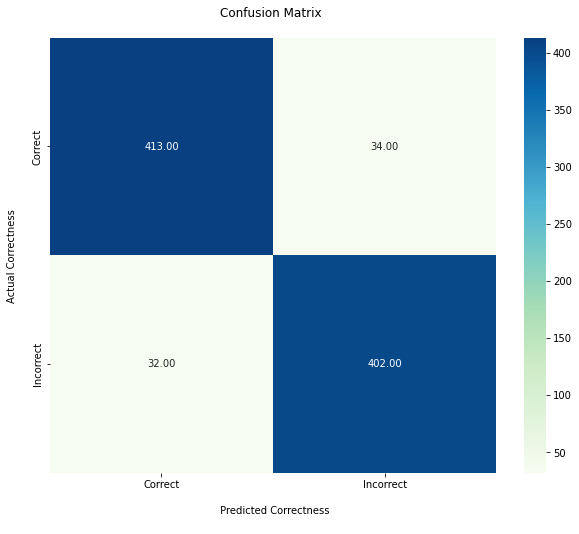

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,rf_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, rf_pred2))
print('Precision:',precision_score(y_test2, rf_pred2))
print('F1 score:', f1_score(y_test2, rf_pred2))
print('Accuracy:',accuracy_score(y_test2, rf_pred2))

recall: 0.9262672811059908
Precision: 0.9220183486238532
F1 score: 0.9241379310344828
Accuracy: 0.9250851305334846


### Decision Tree

In [ ]:
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(X_train2, y_train2)  
dt_train2 = dt_model2.score(X_train2,y_train2)
print('Training Accuracy:',dt_train2)

Training Accuracy: 1.0


In [ ]:
dt_test2 = dt_model2.score(X_test2,y_test2)
print('Testing Accuracy:', dt_test2)

Testing Accuracy: 0.9160045402951191


In [ ]:
dt_pred2= dt_model2.predict(X_test2)

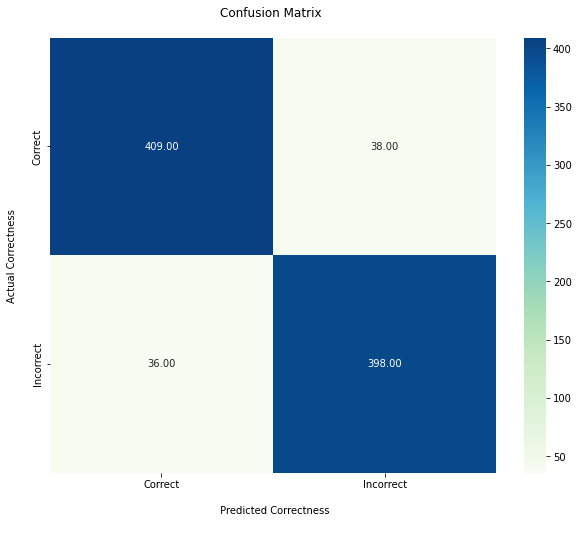

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,dt_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, dt_pred2))
print('Precision:',precision_score(y_test2, dt_pred2))
print('F1 score:', f1_score(y_test2, dt_pred2))
print('Accuracy:',accuracy_score(y_test2, dt_pred2))

recall: 0.9170506912442397
Precision: 0.9128440366972477
F1 score: 0.9149425287356322
Accuracy: 0.9160045402951191


### Multinomial Naive Bayes

In [ ]:
mnb_model2 = MultinomialNB(alpha=0.15)
mnb_model2.fit(X_train2, y_train2)  
mnb_train2 = mnb_model2.score(X_train2,y_train2)
print('Training Accuracy:',mnb_train2)

Training Accuracy: 0.956003406187908


In [ ]:
mnb_test2 = mnb_model2.score(X_test2,y_test2)
print('Testing Accuracy:', mnb_test2)

Testing Accuracy: 0.8490351872871736


In [ ]:
mnb_pred2= mnb_model2.predict(X_test2)

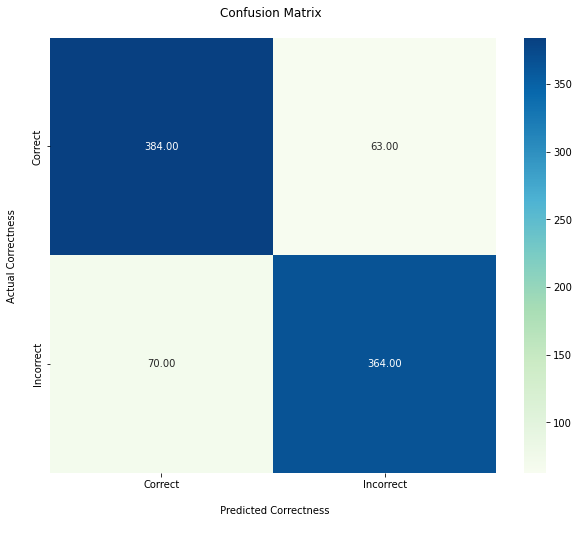

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,mnb_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()


In [ ]:
print('recall:',recall_score(y_test2, mnb_pred2))
print('Precision:',precision_score(y_test2, mnb_pred2))
print('F1 score:', f1_score(y_test2, mnb_pred2))
print('Accuracy:',accuracy_score(y_test2, mnb_pred2))

recall: 0.8387096774193549
Precision: 0.8524590163934426
F1 score: 0.8455284552845529
Accuracy: 0.8490351872871736


# **BAGGING CLASSFIER**

In [ ]:
# define a decision tree classifier as the base estimator
base_estimator2 = DecisionTreeClassifier()

# define the bagging classifier with 100 estimators
bagging2 = BaggingClassifier(base_estimator=base_estimator2, n_estimators=100, random_state=42)

# train the bagging classifier on the training data
b_train2 = bagging2.fit(X_train2, y_train2)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
b_test2 = bagging2.score(X_test2,y_test2)
print('Testing Accuracy:', b_test2)

Testing Accuracy: 0.9114642451759364


In [ ]:
b_pred2= bagging2.predict(X_test2)

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,b_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, b_pred2))
print('Precision:',precision_score(y_test2, b_pred2))
print('F1 score:', f1_score(y_test2, b_pred2))
print('Accuracy:',accuracy_score(y_test2, b_pred2))

recall: 0.9124423963133641
Precision: 0.908256880733945
F1 score: 0.9103448275862069
Accuracy: 0.9114642451759364


# **STACKING CLASSIFIER**

In [ ]:
# define the base models
base_models2 = [('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
               ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))]

# define the meta model
meta_model2 = LogisticRegression()

# define the stacking classifier
stacking2 = StackingClassifier(estimators=base_models2, final_estimator=meta_model2, cv=KFold(n_splits=5))

# fit the stacking classifier on the training data
s_train2=stacking2.fit(X_train2, y_train2)

In [ ]:
s_test2 = stacking2.score(X_test2,y_test2)
print('Testing Accuracy:', s_test2)

Testing Accuracy: 0.9205448354143019


In [ ]:
s_pred2= stacking2.predict(X_test2)

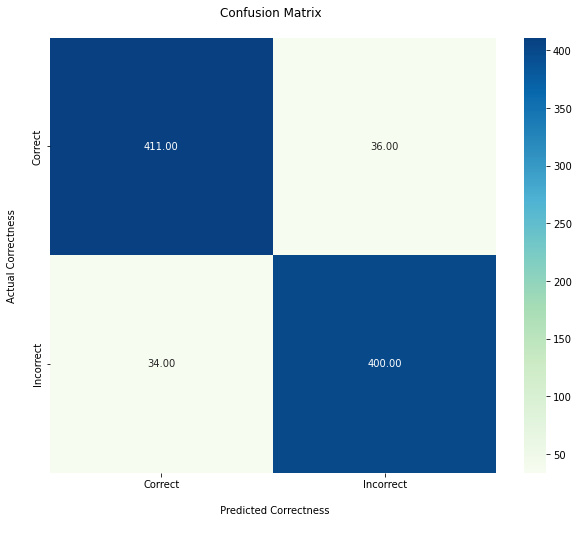

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,s_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, s_pred2))
print('Precision:',precision_score(y_test2, s_pred2))
print('F1 score:', f1_score(y_test2, s_pred2))
print('Accuracy:',accuracy_score(y_test2, s_pred2))

recall: 0.9216589861751152
Precision: 0.9174311926605505
F1 score: 0.9195402298850575
Accuracy: 0.9205448354143019


# **VOTING CLASSIFIER**

In [ ]:
# Define the individual classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=3)

# Define the voting classifier
voting_clf2 = VotingClassifier(estimators=[('lr', clf1), ('nb', clf2), ('knn', clf3)], voting='hard')

# Train the voting classifier on the training data
voting_clf2.fit(X_train2, y_train2)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
v_test2 = voting_clf2.score(X_test2,y_test2)
print('Testing Accuracy:', v_test2)

Testing Accuracy: 0.9194097616345063


In [ ]:
v_pred2= voting_clf2.predict(X_test2)

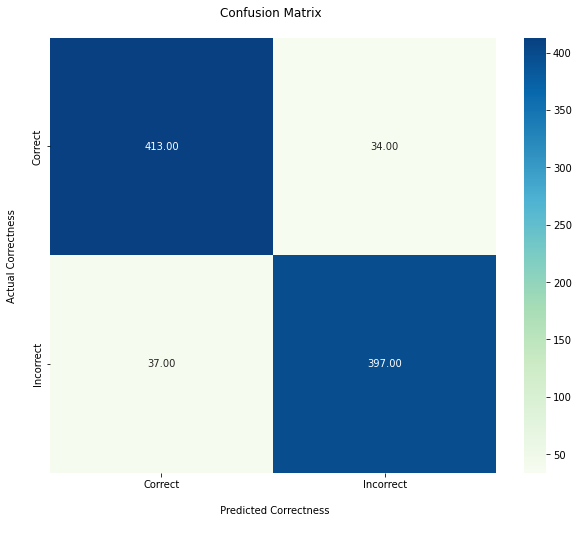

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test2,v_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Correctness\n')
fx.set_ylabel('Actual Correctness\n');
fx.xaxis.set_ticklabels(['Correct','Incorrect'])
fx.yaxis.set_ticklabels(['Correct','Incorrect'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test2, v_pred2))
print('Precision:',precision_score(y_test2, v_pred2))
print('F1 score:', f1_score(y_test2, v_pred2))
print('Accuracy:',accuracy_score(y_test2, v_pred2))

recall: 0.9147465437788018
Precision: 0.9211136890951276
F1 score: 0.9179190751445087
Accuracy: 0.9194097616345063


# **ROC CURVE**

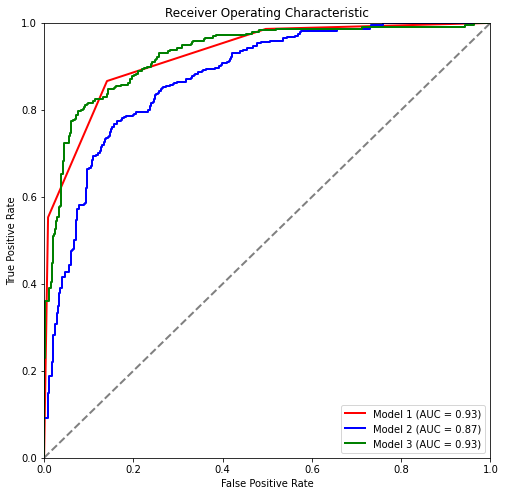

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define list of models
models = [knn_model, lr_model, mnb_model]

# Define colors for each model's curve
colors = ['red', 'blue', 'green', ...]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot ROC curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show plot
plt.show()


# **Precision-Recall Curve**

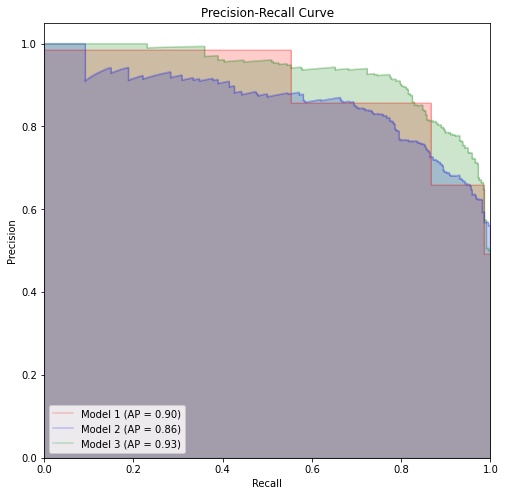

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Define list of models
models = [knn_model, lr_model, mnb_model]

# Define colors for each model's curve
colors = ['red', 'blue', 'green', ...]

# Initialize plot
plt.figure(figsize=(8, 8))

# Plot precision-recall curve for each model
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    average_precision = average_precision_score(y_test, y_score)
    plt.step(recall, precision, color=colors[i], alpha=0.2, where='post',
             label='Model %d (AP = %0.2f)' % (i+1, average_precision))
    plt.fill_between(recall, precision, step='post', alpha=0.2, color=colors[i])

# Set plot properties 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show plot
plt.show()


In [ ]:
# text= 'আপনার সাথে আমার একটি গোপন পরার্মশ আছে । আপনার সঙ্গে আমার একটি গোপনীয় পরার্মশ আছে । তোমার সাথে আমার একটি গোপন পরার্মশ আছে । তোমার সঙ্গে আমার একটি গোপনীয় পরামর্শ আছে । মনে রাখবে আবশ্যকীয় ব্যয়ে কার্পণ্যতা অনুচিৎ । মূমুর্ষু অবস্থায় স্যার হাসপাতালে রয়েছেন । মূমুর্ষু অবস্থায় রহিম সাহেব হাসপাতালে রয়েছেন । তার দুর্নীবার ইচ্ছা শক্তি বাধা অতিক্রম করবে । ব্যাকরন বইটি নিয়ে আসো। আমার ব্যাকরন বই নেয় ।'

In [ ]:
! pip install bnlp-toolkit
! pip install bltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 78.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432537 sha256=59280164f78820fefa05ec95155db51f388c766b69a2eefdf38af37a6dc42b15
  Stored in directory: /root/.cache/pip/wheels/40/95/27/80bfbeb60364f00de71ea3570cb9b76ab17c8e8ab944c2d81b
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=07dfd7f8c51714ee3ad6f7f6780c44db2084432755ea36a0e34659c7aad9e5b0
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built bltk sklearn


In [ ]:
import pickle
from bltk.langtools import Tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
with open('/content/drive/MyDrive/text_classification/stack_clf.pkl', 'wb') as f:
    pickle.dump(stacking, f)

In [ ]:
text = 'আমি বাংলায় গান গাই। তিনি খাবার খাই।'

In [ ]:
tokenizer = Tokenizer()
lines = tokenizer.sentence_tokenizer(text)
lines

['আমি বাংলায় গান গাই।', 'তিনি খাবার খাই।']

In [ ]:
with open('/content/drive/MyDrive/text_classification/stack_clf.pkl', 'rb') as f:
    f_c = pickle.load(f)

In [ ]:
from bnlp import NLTKTokenizer

In [ ]:
def generate_result():

  text = input('Enter input Bengali paragraph: ')
  tokenizer = Tokenizer()
  lines = tokenizer.sentence_tokenizer(text)

  for line in lines:

    
    print("\n")
    transform_text = vectorizer.transform([line])
    pred = rf_model.predict(transform_text)
    

    if(pred[0] == 0):
      print(line+'--'+'Correct Sentence')
    else:
      print(line+'--'+'Incorrect Sentence')

In [ ]:
generate_result()

Enter input Bengali paragraph: jfasl;kjlasdfj
